# Prediction Car Prices using KNeighborsRegressor ML Technique.

In this project, I am going to use KneighborsRegressor() to look for the best features and the optimums values of K to predict the car prices according to the dataset. 

Data Set Summary : The dataset contains information on various cars about their different technical aspects and specifications such as their make, number of doors, horsepower, engine size, city and highway mpg etc.

Data Source : https://archive.ics.uci.edu/ml/datasets/Automobile

Goal : The goal of this project is to predict the prices of cars based on the available specifications.

In [6]:
import pandas as pd
import numpy as np

cols = ['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 
        'drive-wheels', 'engine-location', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type', 
        'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-rate', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']

cars = pd.read_csv('imports-85.data', names=cols)

num_cols = ['normalized-losses', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'bore', 'stroke', 'compression-rate', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']

num_cars = cars[num_cols]

num_cars.head()

,normalized-losses,wheel-base,length,width,height,curb-weight,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,?,88.6,168.8,64.1,48.8,2548,3.47,2.68,9.0,111,5000,21,27,13495
1,?,88.6,168.8,64.1,48.8,2548,3.47,2.68,9.0,111,5000,21,27,16500
2,?,94.5,171.2,65.5,52.4,2823,2.68,3.47,9.0,154,5000,19,26,16500
3,164,99.8,176.6,66.2,54.3,2337,3.19,3.40,10.0,102,5500,24,30,13950
4,164,99.4,176.6,66.4,54.3,2824,3.19,3.40,8.0,115,5500,18,22,17450


In [7]:
num_cars = num_cars.replace('?', np.nan)
num_cars.head()

,normalized-losses,wheel-base,length,width,height,curb-weight,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,NaN,88.6,168.8,64.1,48.8,2548,3.47,2.68,9.0,111,5000,21,27,13495
1,NaN,88.6,168.8,64.1,48.8,2548,3.47,2.68,9.0,111,5000,21,27,16500
2,NaN,94.5,171.2,65.5,52.4,2823,2.68,3.47,9.0,154,5000,19,26,16500
3,164,99.8,176.6,66.2,54.3,2337,3.19,3.40,10.0,102,5500,24,30,13950
4,164,99.4,176.6,66.4,54.3,2824,3.19,3.40,8.0,115,5500,18,22,17450


In [8]:
num_cars = num_cars.astype('float')
num_cars.isnull().sum()

normalized-losses    41
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
bore                  4
stroke                4
compression-rate      0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

In [9]:
#lets drop the rows with nan values that we have in the price column

num_cars = num_cars.dropna(subset=['price'], how= 'any')
num_cars.isnull().sum()

normalized-losses    37
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
bore                  4
stroke                4
compression-rate      0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 0
dtype: int64

In [10]:
# Lets replace the missing values wiht the mean of each column

num_cars = num_cars.fillna(num_cars.mean())
num_cars.isnull().sum()

normalized-losses    0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
bore                 0
stroke               0
compression-rate     0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [11]:
# No lets normalize the columns except the price which will be our target in the rnge 0 to 1
price_col = num_cars['price']
normalized_cars = (num_cars - num_cars.min())/(num_cars.max()-num_cars.min())

num_cars.head(1)


,normalized-losses,wheel-base,length,width,height,curb-weight,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,122.0,88.6,168.8,64.1,48.8,2548.0,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,13495.0


In [12]:
normalized_cars.head(1)

,normalized-losses,wheel-base,length,width,height,curb-weight,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,0.298429,0.058309,0.413433,0.324786,0.083333,0.411171,0.664286,0.290476,0.125,0.294393,0.346939,0.222222,0.289474,0.207959


In [13]:
normalized_cars['price'] = price_col
normalized_cars.head(1)

,normalized-losses,wheel-base,length,width,height,curb-weight,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,0.298429,0.058309,0.413433,0.324786,0.083333,0.411171,0.664286,0.290476,0.125,0.294393,0.346939,0.222222,0.289474,13495.0


# Univariate Model

- In order to understand better the code workflow and the features lets start trying some simple models to move to another more complex models.

In [14]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

def knn_train_test(train_col, target, df):
    if target not in df.columns:
        return print("Please select a correct column")
    
    knn = KNeighborsRegressor()
    np.random.seed(1)
    
    #randomizing the order of the rows
    shuffled_index = np.random.permutation(df.index)
    rand_df = df.reindex(shuffled_index)
    
    last_train_row = int(len(df)/2)
    
    train = rand_df.iloc[:last_train_row]
    test = rand_df.iloc[last_train_row:]
    
    #lets train our knn model with a default k value
    
    knn.fit(train[[train_col]], train[target])
    
    predictions = knn.predict(test[[train_col]])
    
    mse = mean_squared_error(test[target], predictions)
    rmse = np.sqrt(mse)
    
    return rmse

rmse_results = {}
train_cols = normalized_cars.columns.drop('price')

for col in train_cols:
    result = knn_train_test(col, 'price', normalized_cars)
    rmse_results[col] = result

rmse_results_series = pd.Series(rmse_results)
print(rmse_results_series.sort_values())
    
    
        

horsepower           4037.037713
curb-weight          4401.118255
highway-mpg          4630.026799
width                4704.482590
city-mpg             4766.422505
length               5427.200961
wheel-base           5461.553998
compression-rate     6610.812153
bore                 6780.627785
normalized-losses    7330.197653
peak-rpm             7697.459696
stroke               8006.529545
height               8144.441043
dtype: float64


In [17]:
# Modifying the function to accept different values of K [1,3,5,7,9]

def knn_train_test(col, target, df):
    
    
    np.random.seed(1)
    
    #randomizing the order of the rows.
    shuffled_index = np.random.permutation(df.index)
    rand_df = df.reindex(shuffled_index)
    
    last_train_row = int(len(rand_df)/2)
    
    train = rand_df.iloc[:last_train_row]
    test = rand_df.iloc[last_train_row:]
    
    k_values = [1,3,5,7,9]
    k_rmses = {}
    
    #lets train our knn model with different values of K
    
    for k in k_values:
        knn = KNeighborsRegressor(n_neighbors = k)
        knn.fit(train[[col]], train[target])
        
        predictions = knn.predict(test[[col]])
        
        mse = mean_squared_error(test[target], predictions)
        rmse = np.sqrt(mse)
        
        k_rmses[k] = rmse
        
    return k_rmses

rmses_result = {}

train_cols = normalized_cars.columns.drop('price')

for col in train_cols:
    result = knn_train_test(col, 'price', normalized_cars)
    rmses_result[col] = result

rmses_result
        
    

{'bore': {1: 8602.5884845006603,
  3: 6984.2394894809158,
  5: 6780.6277846859757,
  7: 6878.0979659215318,
  9: 6866.8085020384133},
 'city-mpg': {1: 5901.1435743547636,
  3: 4646.7464087271546,
  5: 4766.4225050901341,
  7: 5232.5230341673159,
  9: 5465.2094925275333},
 'compression-rate': {1: 8087.205346523092,
  3: 7375.0636855783587,
  5: 6610.8121531591287,
  7: 6732.8012829415147,
  9: 7024.4855254634349},
 'curb-weight': {1: 5264.2902307588784,
  3: 5022.3180117572329,
  5: 4401.1182547931239,
  7: 4330.6081044180528,
  9: 4632.0444744544011},
 'height': {1: 8904.0464563607093,
  3: 8277.6096430455254,
  5: 8144.4410426637469,
  7: 7679.5981243937731,
  9: 7811.0360629122297},
 'highway-mpg': {1: 6025.5949667207387,
  3: 4617.3050197885541,
  5: 4630.0267985880564,
  7: 4796.0614401869461,
  9: 5278.3580569539872},
 'horsepower': {1: 4170.0548480378011,
  3: 4020.8492630885394,
  5: 4037.0377131537603,
  7: 4353.8118602771337,
  9: 4515.1356174191033},
 'length': {1: 4628.45550

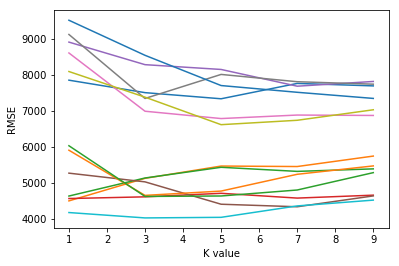

In [27]:
import matplotlib.pyplot as plt
%matplotlib inline

for k, v in rmses_result.items():
    x = list(v.keys())
    y = list(v.values())
    
    plt.plot(x,y)
    plt.xlabel('K value')
    plt.ylabel('RMSE')


# Multivariate model

 - Lets modify our function model to make it work with multiple columns
 - Lets grab the k value of each feature with the lowest RMSE which is our best k_value

In [43]:
feature_best_k = {}

for k, v in rmses_result.items():
    min_rmse = np.min(list(v.values()))
    feature_best_k[k] = min_rmse

feature_best_k_series = pd.Series(feature_best_k)
best_features = feature_best_k_series.sort_values()
best_features

horsepower           4020.849263
curb-weight          4330.608104
wheel-base           4493.734069
width                4559.257298
highway-mpg          4617.305020
length               4628.455501
city-mpg             4646.746409
compression-rate     6610.812153
bore                 6780.627785
normalized-losses    7330.197653
stroke               7338.684670
peak-rpm             7340.041341
height               7679.598124
dtype: float64

 - lets modify our model to accept more than one column, in order to get, the RMSE value using 2, 3, 4, 5 and 6 best features and decidewhat is best for our predictions
    

In [63]:
def knn_train_test(col, target, df):
    np.random.seed(1)
    
    #randomizing the model
    shuffle_ind = np.random.permutation(df.index)
    rand_df = df.reindex(shuffle_ind)
    
    last_train_row = int(len(rand_df)/2)
    
    train = rand_df[:last_train_row]
    test = rand_df[last_train_row:]
    
    k_values = [5]
    rmses = {}
    
    #lets train our model
    for k in k_values:   
        knn = KNeighborsRegressor(n_neighbors = k)
        knn.fit(train[col], train[target])
        
        predictions = knn.predict(test[col])
        
        mse = mean_squared_error(test[target], predictions)
        
        rmse = np.sqrt(mse)
        
        rmses[k] = rmse
    
    return rmses

rmses_result = {}

# best 2 features example
#result_2 = knn_train_test(best_features[:2].keys(), 'price', normalized_cars)
#rmses_result['2' +' best features'] = result_2

for k in [2,3,4,5,6]:
    result = knn_train_test(best_features[:k].keys(), 'price', normalized_cars)
    name = str(k) + ' best features'
    rmses_result[name] = result

#best_features[:2].keys()
rmses_result
    

{'2 best features': {5: 3257.8490494359762},
 '3 best features': {5: 3835.2559827820287},
 '4 best features': {5: 3685.6167299918802},
 '5 best features': {5: 3688.6902918660612},
 '6 best features': {5: 3760.204908098905}}

 - In our model we can see that our top 3 RMSE are: 2 best features, 4 best features and 5 best feature.
 

# Hyperparameterer Tuning

 - Now we are going to add a new functionality to our knn_train_test function t use hyperparameters for 1 to 25 and plot the reuslting RMSE

In [66]:
def knn_train_test(col, target, df):
    np.random.seed(1)
    
    #randomizing the model
    shuffle_ind = np.random.permutation(df.index)
    rand_df = df.reindex(shuffle_ind)
    
    last_train_row = int(len(rand_df)/2)
    
    train = rand_df[:last_train_row]
    test = rand_df[last_train_row:]
    
    k_values = [i for i in range(1, 25)]
    rmses = {}
    
    #lets train our model
    for k in k_values:   
        knn = KNeighborsRegressor(n_neighbors = k)
        knn.fit(train[col], train[target])
        
        predictions = knn.predict(test[col])
        
        mse = mean_squared_error(test[target], predictions)
        
        rmse = np.sqrt(mse)
        
        rmses[k] = rmse
    
    return rmses

rmses_result = {}

# now we want to use 2 fetaures, 4 and 5

for k in [2, 4, 5]:
    result = knn_train_test(best_features[:k].keys(), 'price', normalized_cars)
    rmses_result[str(k) + ' BestFeatures'] = result

rmses_result


{'2 BestFeatures': {1: 2790.1071433346656,
  2: 2700.7472352504356,
  3: 3003.7488055243016,
  4: 3106.6056255976632,
  5: 3257.8490494359762,
  6: 3660.4870928437499,
  7: 3776.6225502488178,
  8: 3990.519746861657,
  9: 4106.6955014280884,
  10: 4292.9277297863191,
  11: 4446.4906886390199,
  12: 4474.5040774983045,
  13: 4535.4331056855617,
  14: 4557.7871348694171,
  15: 4626.4462347361496,
  16: 4616.7151115294228,
  17: 4627.5905281808327,
  18: 4591.4047601164393,
  19: 4602.1004788310302,
  20: 4609.448817726754,
  21: 4643.4916853197637,
  22: 4652.9025198182853,
  23: 4697.6328384160206,
  24: 4738.0273789871562},
 '4 BestFeatures': {1: 3011.9541615514549,
  2: 3154.0883734958638,
  3: 3316.7098078359127,
  4: 3519.4051401085912,
  5: 3685.6167299918802,
  6: 3911.3479785555946,
  7: 3985.117966980356,
  8: 4112.0224825464929,
  9: 4147.0317425311187,
  10: 4289.9688890145662,
  11: 4352.0751636824025,
  12: 4397.8455186128413,
  13: 4506.0688241128673,
  14: 4584.89987027729

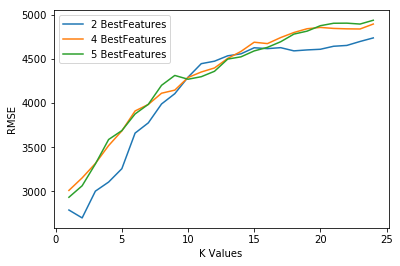

In [87]:
for k, v in rmses_result.items():
    x = list(v.keys())
    y = list(v.values())
   
    plt.plot(x, y, label = k)
    plt.xlabel('K Values')
    plt.ylabel('RMSE')
    plt.legend()
    
    

### Conclusions:

 - From the graph, we can observe that for values of k < 10 we obtain the smallest RMSE and we have a significant reduction on the RMSE when we use our 2 best_features which are: 
     "horsepower" & "curb-weight"
     
 - In order to predcit the price we will use, according to the research values of k < 10 and the features "horsepower" & "curb-weight"

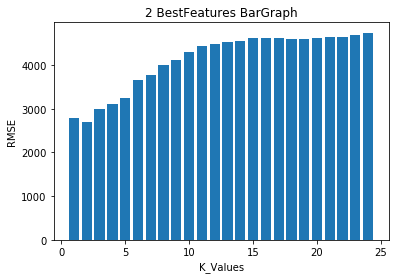

In [93]:
x = list(rmses_result['2 BestFeatures'].keys())
y = list(rmses_result['2 BestFeatures'].values())

plt.bar(x, y)
plt.title("2 BestFeatures BarGraph")
plt.xlabel("K_Values")
plt.ylabel("RMSE")

 - The optimum K_value would be 2 but for our model, choosing 2 best features horsepower and curb_weigh and any value for k less the 10 get a better error than any of the other features.